In [29]:
#import the package
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [30]:
#define the file path
keyboard_file= 'Dataset/nsynth-test/audio/keyboard_acoustic_004-025-100.wav'
string_file = 'Dataset/nsynth-test/audio/string_acoustic_012-026-025.wav'
#Store class names in array
class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal']
#Store source names in array
source_names=['acoustic', 'electronic', 'synthetic']


#load the waveform y and sampling rate s
y1, sr1 = librosa.load(keyboard_file, sr=None)
print(y)
print(sr)

hop_length = 512

y2, sr2 = librosa.load(string_file, sr=None)
print(y2)
print(sr2)


[ 0.         -0.00015259 -0.00039673 ...  0.          0.
  0.        ]
16000
[0. 0. 0. ... 0. 0. 0.]
16000


In [33]:
# Separate harmonics and percussives into two waveforms
y1_harmonic, y1_percussive = librosa.effects.hpss(y)
y2_harmonic, y2_percussive = librosa.effects.hpss(y2)
# Compute Mel-Frequency Cepstral Coefficients (MFCC) features 
# from the raw signal
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1, hop_length=hop_length, n_mfcc=13)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2, hop_length=hop_length, n_mfcc=13)
# And the first-order differences (delta features)
mfcc_delta1 = librosa.feature.delta(mfcc1)
mfcc_delta2 = librosa.feature.delta(mfcc2)
# Mel Spectrogram
mel_spectrogram1 = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=128, 
                                                 fmax = 8000)
mel_spectrogram2 = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=128, 
                                                 fmax = 8000)
#Spectrogram of Short Time Fourier Transform
spectrogram1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), 
                                      ref=np.max)
spectrogram2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), 
                                      ref=np.max)
# Compute chroma features from the harmonic signal
chromagram1 = librosa.feature.chroma_cqt(y=y1_harmonic,
                                        sr=sr1)
chromagram2 = librosa.feature.chroma_cqt(y=y2_harmonic,
                                        sr=sr2)
#Compute the centroid 
centroid1 = librosa.feature.spectral_centroid(y=y1, sr=sr1)
centroid2 = librosa.feature.spectral_centroid(y=y2, sr=sr2)
#Spectral Contrast
spectral_contrast1 = librosa.feature.spectral_contrast(y=y1, sr=sr1)
spectral_contrast2 = librosa.feature.spectral_contrast(y=y2, sr=sr2)

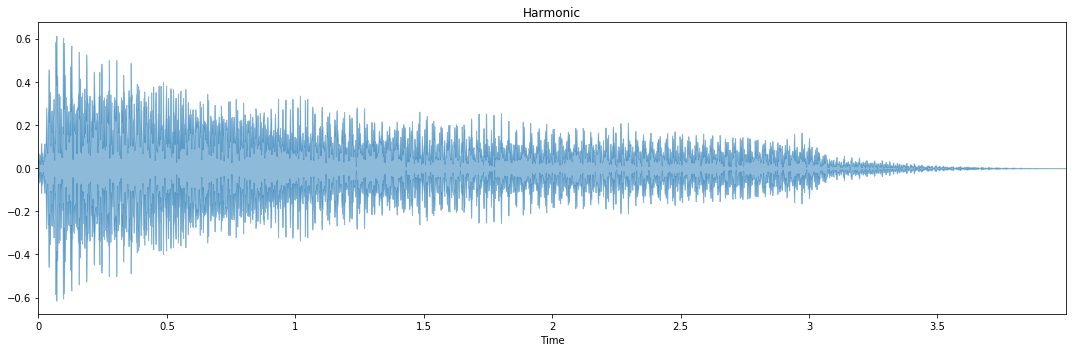

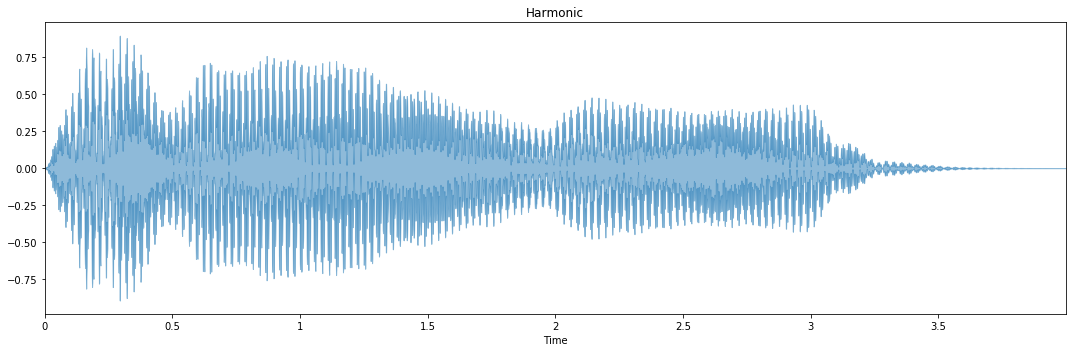

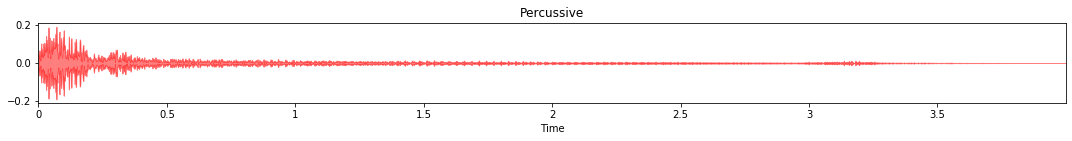

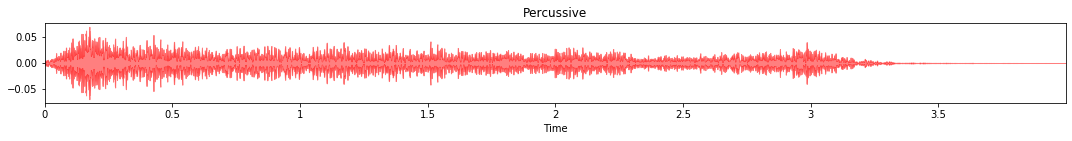

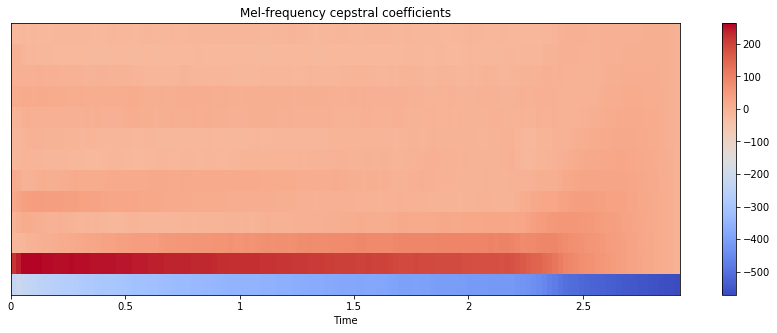

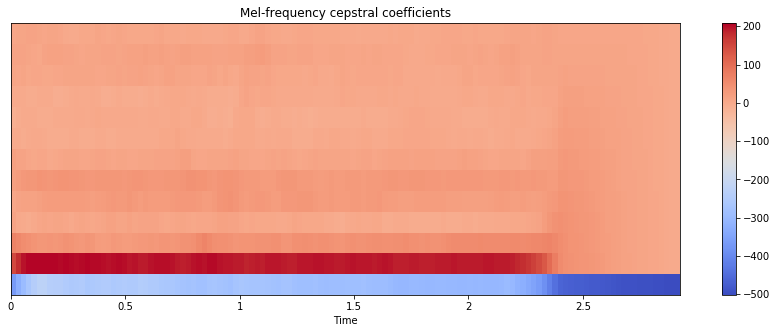

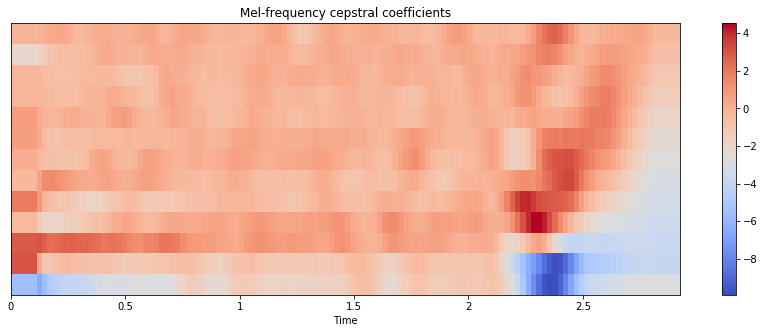

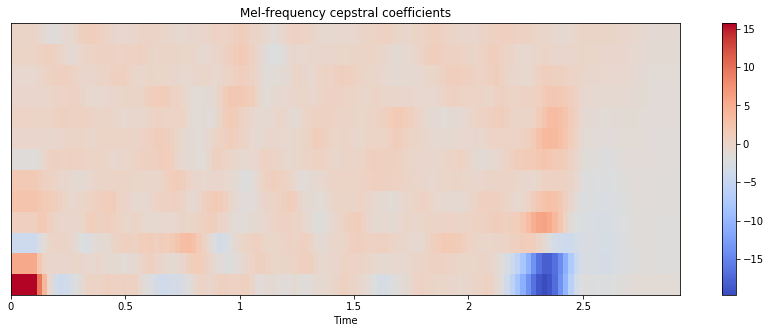

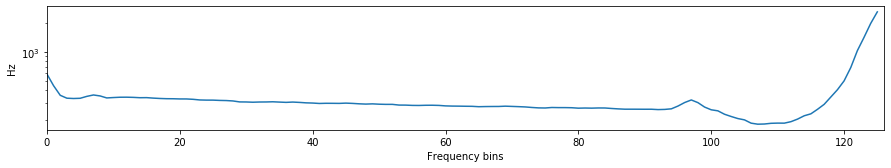

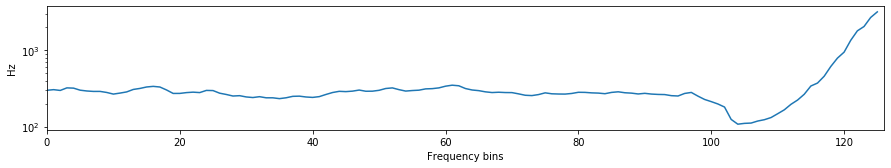

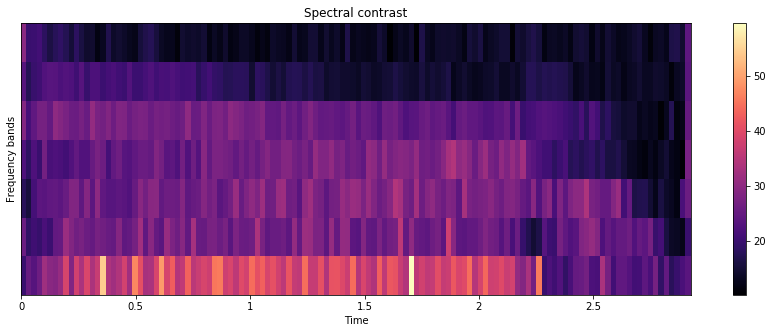

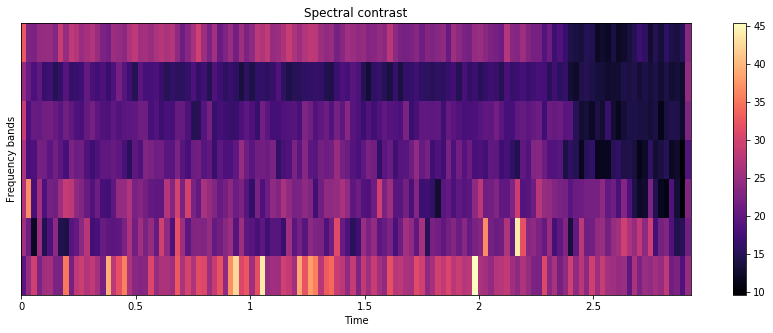

In [34]:
plt.figure(0,figsize=(15,5))
librosa.display.waveplot(y1_harmonic, sr=sr1, alpha=0.5)
plt.title('Harmonic')
plt.tight_layout()
plt.show()

plt.figure(0,figsize=(15,5))
librosa.display.waveplot(y2_harmonic, sr=sr2, alpha=0.5)
plt.title('Harmonic')
plt.tight_layout()
plt.show()

#######################################################
plt.figure(1, figsize=(15,5))
plt.subplot(3, 1, 1)
librosa.display.waveplot(y1_percussive, sr=sr1, color='r', alpha=0.5)
plt.title('Percussive')
plt.tight_layout()
plt.show()

plt.figure(1, figsize=(15,5))
plt.subplot(3, 1, 1)
librosa.display.waveplot(y2_percussive, sr=sr2, color='r', alpha=0.5)
plt.title('Percussive')
plt.tight_layout()
plt.show()
######################################################
plt.figure(2, figsize=(15,5))
librosa.display.specshow(mfcc1, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients')
plt.show()

plt.figure(2, figsize=(15,5))
librosa.display.specshow(mfcc2, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients')
plt.show()

######################################################

plt.figure(3, figsize=(15,5))
librosa.display.specshow(mfcc_delta1, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients')
plt.show()

plt.figure(3, figsize=(15,5))
librosa.display.specshow(mfcc_delta2, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients')
plt.show()

######################################################

plt.figure(4, figsize=(15,5))
plt.subplot(2, 1, 1)
plt.semilogy(centroid1.T, label='Spectral Centroid')
plt.ylabel('Hz')
plt.xticks(np.arange(0,centroid1.shape[-1],20))
plt.xlim([0, centroid1.shape[-1]])
plt.xlabel('Frequency bins')
plt.show()

plt.figure(4, figsize=(15,5))
plt.subplot(2, 1, 1)
plt.semilogy(centroid2.T, label='Spectral Centroid')
plt.ylabel('Hz')
plt.xticks(np.arange(0,centroid2.shape[-1],20))
plt.xlim([0, centroid2.shape[-1]])
plt.xlabel('Frequency bins')
plt.show()

########################################################

plt.figure(5, figsize=(15,5))
librosa.display.specshow(spectral_contrast1,x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.show()

plt.figure(5, figsize=(15,5))
librosa.display.specshow(spectral_contrast2,x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.show()